<a href="https://colab.research.google.com/github/Ashu10051998/Face-Emotion-Detection/blob/main/emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip

--2021-09-22 05:24:23--  https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/si11cws2pyho1bp/archive.zip [following]
--2021-09-22 05:24:23--  https://www.dropbox.com/s/raw/si11cws2pyho1bp/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd899efe4c20313e85e1bab823b.dl.dropboxusercontent.com/cd/0/inline/BWqwUA9UWarnscieEjzQFTPr1ItKLOsXp5wel2O-WIqJVxF_7BK5VAmZzu7Cixp5iCOPom7iO-Zm3myah9uImTDsuxtOY1As0sjbVZHki4Cr3PBviJSwy9OZrdXG26-qTaO4P_DDJjYKWaaE_DIbOze2/file# [following]
--2021-09-22 05:24:23--  https://ucd899efe4c20313e85e1bab823b.dl.dropboxusercontent.com/cd/0/inline/BWqwUA9UWarnscieEjzQFTPr1ItKLOsXp5wel2O-WIqJVxF_7BK5VAmZzu7Cixp5iCOPom7iO-Zm3myah9uImTDsuxtOY

In [3]:
!unzip -q "/content/archive.zip"

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [5]:
# Creating the Pathlib PATH objects
train_path = Path("/content/train")
test_path = Path("/content/test")

In [6]:
# Getting Image paths 
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['/content/train/happy/Training_41477899.jpg',
 '/content/train/happy/Training_61706679.jpg',
 '/content/train/happy/Training_68886569.jpg',
 '/content/train/happy/Training_35728842.jpg',
 '/content/train/happy/Training_10717931.jpg',
 '/content/train/happy/Training_86039203.jpg',
 '/content/train/happy/Training_18383577.jpg',
 '/content/train/happy/Training_28198433.jpg',
 '/content/train/happy/Training_53772653.jpg',
 '/content/train/happy/Training_38756386.jpg']

In [7]:
# Getting their respective labels 

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy',
 'happy']

In [8]:
from sklearn.preprocessing import LabelEncoder 

In [9]:
Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)
train_image_labels[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [10]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [11]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels , test_size = 0.25)

In [12]:
classTotals = Train_labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

class_weight = {e : weight for e , weight in enumerate(classWeight)}
print(class_weight)

{0: 1.8151627, 1: 17.0694, 2: 1.732629, 3: 1.0, 4: 1.4577048, 5: 1.4947513, 6: 2.286016}


In [13]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [14]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 96 
BATCH_SIZE = 32

In [15]:
# Basic Transformation
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)])

In [16]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.1, -0.05))
])

In [17]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels , test_size = 0.25)

In [18]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
    
    dataset = dataset.repeat()
    return dataset

In [19]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 461 ms, sys: 8.63 ms, total: 469 ms
Wall time: 602 ms
(32, 96, 96, 3)
(32, 7)


fear


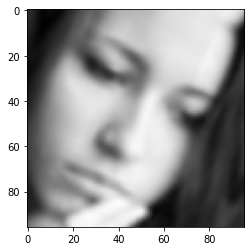

In [20]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(96 , 96 , 3))

In [21]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 28.3 ms, sys: 1.87 ms, total: 30.2 ms
Wall time: 30 ms
(32, 96, 96, 3)
(32, 7)


In [22]:
# Building EfficientNet model
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.summary()

31801344/31790344 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb2 (Functional)  (None, 3, 3, 1408)        7768569   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1408)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               180352    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 903       
Total params: 7,949,824
Trainable params: 7,882,249
Non-trainable params: 67,575
_________________________________________________________________


In [23]:
model.layers[0].trainable = False

In [24]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [25]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [26]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=12,
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/12
672/672 [==============================] - 437s 636ms/step - loss: 3.0850 - accuracy: 0.3149 - precision: 0.6265 - recall: 0.0648 - val_loss: 1.5912 - val_accuracy: 0.3955 - val_precision: 0.7148 - val_recall: 0.1147
Epoch 2/12
672/672 [==============================] - 427s 636ms/step - loss: 2.9377 - accuracy: 0.3551 - precision: 0.6366 - recall: 0.1009 - val_loss: 1.6378 - val_accuracy: 0.3507 - val_precision: 0.7095 - val_recall: 0.1002
Epoch 3/12
672/672 [==============================] - 422s 628ms/step - loss: 2.8674 - accuracy: 0.3620 - precision: 0.6189 - recall: 0.1120 - val_loss: 1.6240 - val_accuracy: 0.3571 - val_precision: 0.6229 - val_recall: 0.1277
Epoch 4/12
672/672 [==============================] - 421s 626ms/step - loss: 2.8401 - accuracy: 0.3760 - precision: 0.6398 - recall: 0.1224 - val_loss: 1.5360 - val_accuracy: 0.4240 - val_precision: 0.7067 - val_recall: 0.1476
Epoch 5/12
672/672 [==============================] - 430s 641ms/step - loss: 2.8255 - a

In [27]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [28]:
model.layers[0].trainable = False

In [29]:
from tensorflow.keras.applications import EfficientNetB2

backbone = EfficientNetB2(
    input_shape=(96, 96, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [30]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=8,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
    class_weight=class_weight
)

Epoch 1/8
672/672 [==============================] - 1654s 2s/step - loss: 2.8086 - accuracy: 0.3989 - precision: 0.6395 - recall: 0.1828 - val_loss: 1.3430 - val_accuracy: 0.4880 - val_precision: 0.6264 - val_recall: 0.3555

Epoch 00001: val_loss improved from inf to 1.34303, saving model to best_weights.h5
Epoch 2/8
672/672 [==============================] - 1634s 2s/step - loss: 2.3935 - accuracy: 0.4907 - precision: 0.6886 - recall: 0.2837 - val_loss: 1.2555 - val_accuracy: 0.5176 - val_precision: 0.6935 - val_recall: 0.3432

Epoch 00002: val_loss improved from 1.34303 to 1.25550, saving model to best_weights.h5
Epoch 3/8
672/672 [==============================] - 1633s 2s/step - loss: 2.2600 - accuracy: 0.5143 - precision: 0.6968 - recall: 0.3194 - val_loss: 1.2785 - val_accuracy: 0.5254 - val_precision: 0.6366 - val_recall: 0.3915

Epoch 00003: val_loss did not improve from 1.25550
Epoch 4/8
672/672 [==============================] - 1632s 2s/step - loss: 2.1423 - accuracy: 0.534

In [35]:
# Create a Dataset Object for 'Testing' Set just the way we did for Training and Validation
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))
test_labels = list(map(lambda x : get_label(x) , test_image_paths))

test_labels = Le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [96 , 96] , method="bilinear")
    return image , label

test_dataset = (
     tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

In [32]:
# Verify Test Dataset Object
image , label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 96, 96, 3)
(32, 7)


In [33]:
# Save Model
model.save("FacialExpressionModel.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [37]:
# Save Label Encoder 
import pickle

def save_object(obj , name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [34]:
model.load_weights("best_weights.h5")

In [38]:
save_object(Le, "LabelEncoder")